##### Python for High School (Winter 2022)

* [Table of Contents](PY4HS.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/Py4HS_Bernoulli.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/Py4HS_Bernoulli.ipynb)

# Bernoulli Numbers

This Notebook was developed after our Summer 2022 virtual classroom, a not for credit enrichment experience.  Earlier in 2022, I served as an 8th grade teacher in a for-credit program, for 1.5 semesters.

As of that time, I had not yet done much with Taylor and Maclaurin Expansions, in terms of Notebooks.  Other teachers were going there for sure.  

I was aiming for some more exotic and/or esoteric topics (this being summer school enrichment), i.e. material non-redundant with topics ordinarily included in a typical college prep high school curriculum, in that day and age.

An historical approach based on the Bernoulli family as a hub, based in Switzerland, came to me later.  I started exploring the ramifications by leveraging Bernoulli numbers as a topic, which connect us back to Pascal's Triangle, already a "grand central station" in our global grid.

These explorations came in conjunction with a certain [Math for Wisdom (M4W)](https://www.math4wisdom.com/) project, managed by one Andrius Kulikauskas in Lithuania.

In [1]:
import sympy as sp
import numpy as np
import pandas as pd

In [2]:
from IPython.display import YouTubeVideo

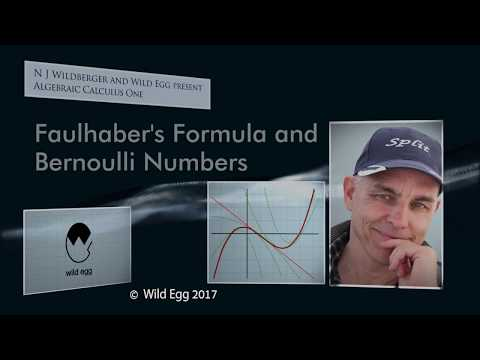

In [3]:
YouTubeVideo("jx_JR5xD9Ko")

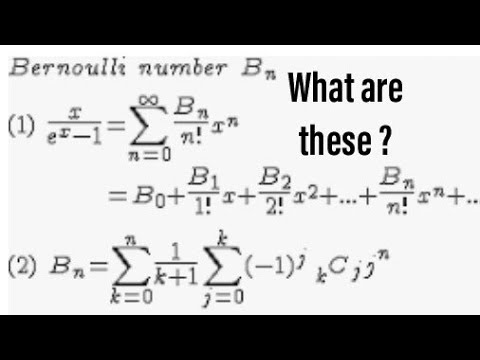

In [4]:
YouTubeVideo("s6-lN62Q_z8")

Consider the expression below.  How many consecutive numbers, starting with 1, you want to sum, is your n.  What power you wish to raise them all to is your m.

In [5]:
m = 3    # n = 10
(   1 ** m 
 +  2 ** m 
 +  3 ** m 
 +  4 ** m 
 +  5 ** m 
 +  6 ** m 
 +  7 ** m 
 +  8 ** m 
 +  9 ** m  
 + 10 ** m)

3025

In [6]:
m, n, i = sp.symbols(['m','n', 'i'])

Here's a way of writing the same expression, leaving the values of m and n open ended.  We will substitute actual values below.

In [7]:
the_sum = sp.summation(i ** m, (i, 1, n))
the_sum

Sum(i**m, (i, 1, n))

Evaluate the above summation with 10 terms (1,2.. 10) each raised to the 3rd power.  If you have this as a live Notebook, say in Collab, this is your chance to play around with other values.

In [8]:
the_sum.evalf(subs={n:10, m:3})

3025.00000000000

Numpy lets us compute this sum in an even more compact form, given raising each of n terms to the mth power may be accomplished in a single line of code.

In [9]:
def exp_sum(m, n):
    return np.sum( np.arange(1, n+1) ** m)

In [10]:
exp_sum(3, 10)

3025

In [11]:
exp_sum(5, 10)

220825

Now the Bernoulli Numbers enter the picture.  We're going to transform our expression for the sum of n consecutive integers starting with 1, to the mth power, into a polynomial of m+1 terms, and n the value of some variable x.  

The more consecutive integers you want, the higher the x you put in, to an already computed polynomial of m+1 terms with fixed coefficients.  What fixed coefficients?  The Bernoulli Numbers will go into their defintion (computation).

In [12]:
n = 20
Bs = [sp.bernoulli(i) for i in range(0, n+1)]

In [13]:
Bernoulli = pd.DataFrame({'Bernoulli':Bs})
Bernoulli

,Bernoulli
0,1
1,-1/2
2,1/6
3,0
4,-1/30
5,0
6,1/42
7,0
8,-1/30
9,0


In [14]:
from scipy.special import comb

def exp_sum_2(m, n):
    n = n + 1
    total = 0
    for k in range(0, m+1):
        term = comb(m+1, k, exact=True) * sp.bernoulli(k) * n**(m-k+1)
        total += term
    return total/(m+1)

In [15]:
exp_sum_2(3, 10)  # new way

3025

In [16]:
exp_sum(3, 10)    # old way

3025

In [17]:
exp_sum_2(5, 10)  # new way

220825

In [18]:
exp_sum(5, 10)    # old way

220825

# Generating Functions

"Generating functions" in mathematics and "generator functions" in Python are not the same concept, but they're related.  We may write generator functions to generate successive coefficients of a polynomial.  These sequences of coefficients are what generating functions represent as well, perhaps as closed form signature expressions.

In the cells below, we use generator functions and actually substitute for x, to verify some known identities.

In [19]:
t, x = sp.symbols(['t', 'x'])

In [20]:
domain = np.linspace(0.1, 2, 100)

In [21]:
def terms():
    n = 0
    while True:
        yield x**n/sp.factorial(n) * sp.bernoulli(n)
        n += 1

In [22]:
gen_coeffs = terms()

In [23]:
poly_coeffs = [next(gen_coeffs) for _ in range(17)]
poly_coeffs

[1,
 -x/2,
 x**2/12,
 0,
 -x**4/720,
 0,
 x**6/30240,
 0,
 -x**8/1209600,
 0,
 x**10/47900160,
 0,
 -691*x**12/1307674368000,
 0,
 x**14/74724249600,
 0,
 -3617*x**16/10670622842880000]

In [24]:
expr = sum(poly_coeffs)  # we will lambdify and plot this below
expr

-3617*x**16/10670622842880000 + x**14/74724249600 - 691*x**12/1307674368000 + x**10/47900160 - x**8/1209600 + x**6/30240 - x**4/720 + x**2/12 - x/2 + 1

In [25]:
expr.subs(x, 1/3)

0.842575491052376

In [26]:
expr2 = x/(sp.E**x - 1)  # we will lambdify and plot this below, comparing with the above
expr2

x/(exp(x) - 1)

In [27]:
expr2.subs(x, 1/3)

0.842575491052376

In [28]:
expr.subs(x, 1).evalf()

0.581976706869318

In [29]:
expr2.subs(x, 1).evalf()

0.581976706869326

In [30]:
B = sp.lambdify(x, expr, "numpy")

In [31]:
E = sp.lambdify(x, expr2)

In [32]:
df = pd.DataFrame({"the_domain": domain,
                   "exponential" : E(domain),
                   "polynomial": B(domain)})
df

,the_domain,exponential,polynomial
0,0.100000,0.950833,0.950833
1,0.119192,0.941588,0.941588
2,0.138384,0.932403,0.932403
3,0.157576,0.923280,0.923280
4,0.176768,0.914219,0.914219
...,...,...,...
95,1.923232,0.329149,0.329149
96,1.942424,0.325057,0.325057
97,1.961616,0.321008,0.321008
98,1.980808,0.317000,0.317000


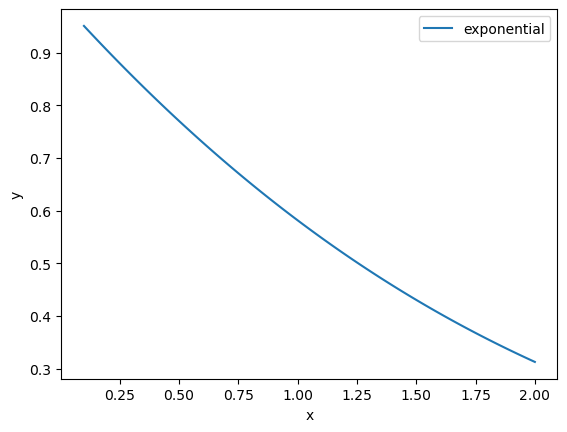

In [33]:
df.plot(x="the_domain", y="exponential", xlabel="x", ylabel="y");

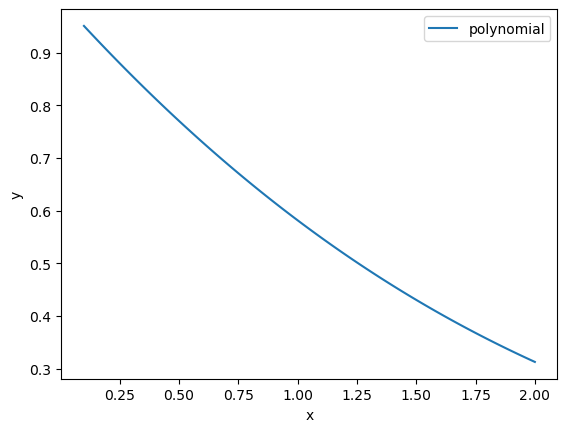

In [34]:
df.plot(x="the_domain", y="polynomial", xlabel="x", ylabel="y");

# Bernoulli Polynomials

In [35]:
def Bn(n):
    for k in range(0, n+1):
        terms = [comb(n, k, exact=True) * sp.bernoulli(n-k) * x**k for k in range(0, n+1)]
    return sum(terms)

In [36]:
Bn(0)

1

In [37]:
Bn(1)

x - 1/2

In [38]:
Bn(2)

x**2 - x + 1/6

In [39]:
Bn(3)

x**3 - 3*x**2/2 + x/2

In [40]:
Bn(4)

x**4 - 2*x**3 + x**2 - 1/30

In [41]:
Bn(5)

x**5 - 5*x**4/2 + 5*x**3/3 - x/6

In [42]:
Bn(6)

x**6 - 3*x**5 + 5*x**4/2 - x**2/2 + 1/42

The term "Bernoulli polynomials" was introduced by J.L. Raabe in 1851. The fundamental property of such polynomials is that they satisfy the finite-difference equation

$$
B_{n}(x+1)−B_{n}(x)= nx^{n−1}
$$

Source:  [Encyclopedia of Mathematics](https://encyclopediaofmath.org/wiki/Bernoulli_polynomials)

In [43]:
def check(n, val):
    return Bn(n).evalf(subs={x:val+1}) - Bn(n).evalf(subs={x:val})

In [44]:
check(6, 9)

354294.000000000

In [45]:
def check2(n, val):
    return n*val**(n-1)

In [46]:
check2(6, 9)

354294

In [47]:
check(8, 100)

800000000000000.

In [48]:
check2(8, 100)

800000000000000

In [49]:
check(5, 20)

800000.000000000

In [50]:
check2(5, 20)

800000